In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')
from gaussxw import gaussxwab

## Exercise 4: Hermite polynomials and the uncertainty of the quantum harmonic oscillator.

In natural units, the wavefunction of the nth energy level of the one-dimensional quantum harmonic oscillator is given by:

$$\Psi_n(x)=\frac{1}{\sqrt{2^n\,n!\sqrt\pi}}\text{e}^{-x^2/2}H_n(x), \quad\text{with}\quad n=0,\cdots,\infty,$$

where $H_n(x)$ is the Hermite polynomial of order $n$.  
The Hermite polynomials satisfy the recurrence relation:

$$H_{n+1}(x)=2xH_n(x)-2n H_{n-1}(x),$$

with the first two Hermite polynomials being

$$H_0(x)=1,\quad H_1(x)=2x.$$

1. Write a program that computes the Hermite polynomials for a given value of $x$, and $n>0$.  
2. Use the function to plot the harmonic oscillator wavefunctions with $n=0,1,2,3$ for values of $x \in [-10,10]$.  
3. The uncertainty in the position of a particle in the nth level of a harmonic oscillator is given by the square root of $\langle x^2\rangle$, with

    $$\langle x^2\rangle=\int_{-\infty}^\infty{x^2 \left\vert\Psi_n(x)\right\vert^2}dx$$

   Use Gaussian quadrature with N=100 to compute the uncertainty of a particle in the nth level. Use the program to compute the uncertainty for the level $n=5$.  


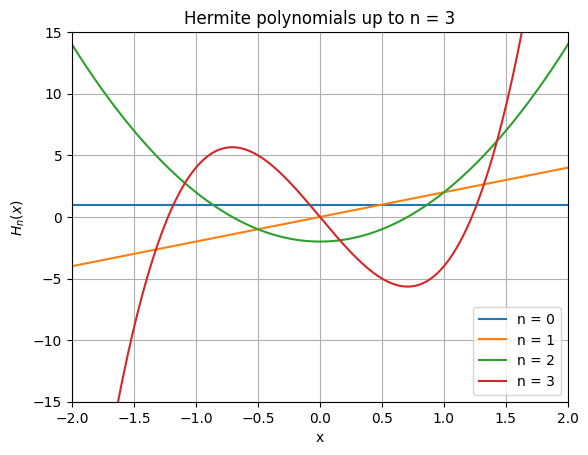

In [2]:
def hermite(n, x):
    assert(type(n) == int)

    if n == 0:
        H =  [1 for _ in x]
    elif n == 1:
        H = 2*x
    else:
        H0 = 1
        H1 = 2*x
        for k in range(1, n):
            H0, H1 = H1, 2*x*H1 - 2*k*H0
            # H1 = 2*x*H1 - 2*k*H0
        H = H1
    return H

x = np.linspace(-10, 10, 1000)

for n in range(4):
    t = 'n = ' + str(int(n))
    y = hermite(n, x)
    plt.plot(x, y, label = t)
plt.grid()
plt.ylim(-15, 15)
plt.xlim(-2, 2)
plt.legend()
plt.title(f'Hermite polynomials up to n = {n}')
plt.xlabel('x')
plt.ylabel("$H_n(x)$")
plt.show()
    

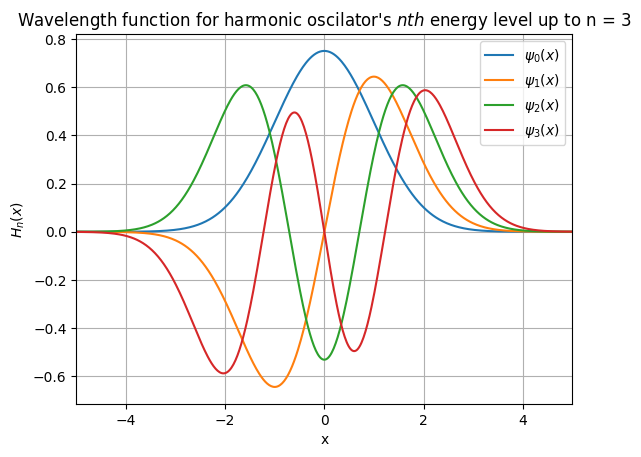

In [3]:
def psi(n, x):
    return hermite(n, x)*np.exp((-x**2)/2)/np.sqrt(math.factorial(n)*np.sqrt(np.pi)*2**n)

x = np.linspace(-10, 10, 1000)
y = psi(2, x)

for n in range(4):
    t = f"$\psi_{n}(x)$"
    plt.plot(x, psi(n, x), label = t)
plt.grid()
plt.xlim(-5, 5)
plt.legend()
plt.title(f'Wavelength function for harmonic oscilator\'s $nth$ energy level up to n = {n}')
plt.xlabel('x')
plt.ylabel("$H_n(x)$")
plt.show()

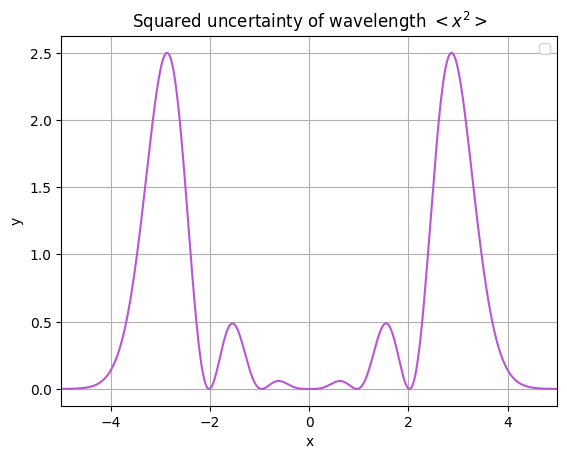

In [4]:
def f(n, x):
        return x**2*np.abs(psi(n, x))**2

x = np.linspace(-10, 10, 1000)
y = f(5, x)

plt.plot(x, y, color = 'mediumorchid')
plt.grid()
plt.xlim(-5, 5)
plt.legend()
plt.title(f'Squared uncertainty of wavelength $<x^2>$')
plt.xlabel('x')
plt.ylabel("y")
plt.show()

In [5]:
def uncertainty(n, x):

    def f(n, x):
        return x**2*np.abs(psi(n, x))**2
    
    def g(n, z):
        return (1 + z**2)*f(n, z/(1 - z**2))/(1 - z**2)**2
    
    xg, wg = gaussxwab(100, -1, 1)
    s = 0
    for i in range(len(xg)):
        s += wg[i]*g(n, xg[i])
    return np.sqrt(s)

y = uncertainty(5, x)
print(f"The uncertainty of the position of a particule for the n = {n} level of energy is {round(y, 2)} kg")

The uncertainty of the position of a particule for the n = 3 level of energy is 2.35 kg
